In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# models from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score,RocCurveDisplay



In [74]:
df = pd.read_csv("./scikit learn/heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


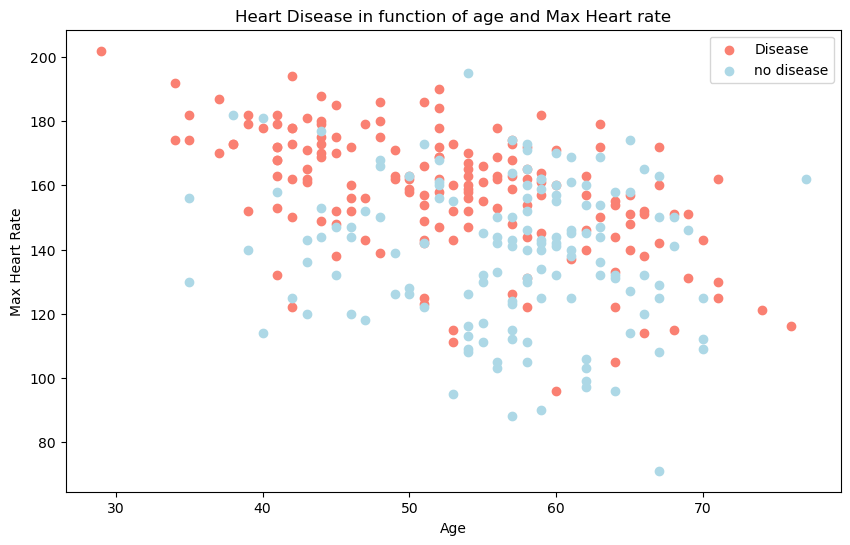

In [75]:
# finding patterns
# scatter with positive examples
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c= "salmon")
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c= "lightblue");

# add some helpful infomatoion

plt.title("Heart Disease in function of age and Max Heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "no disease"]);

In [76]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


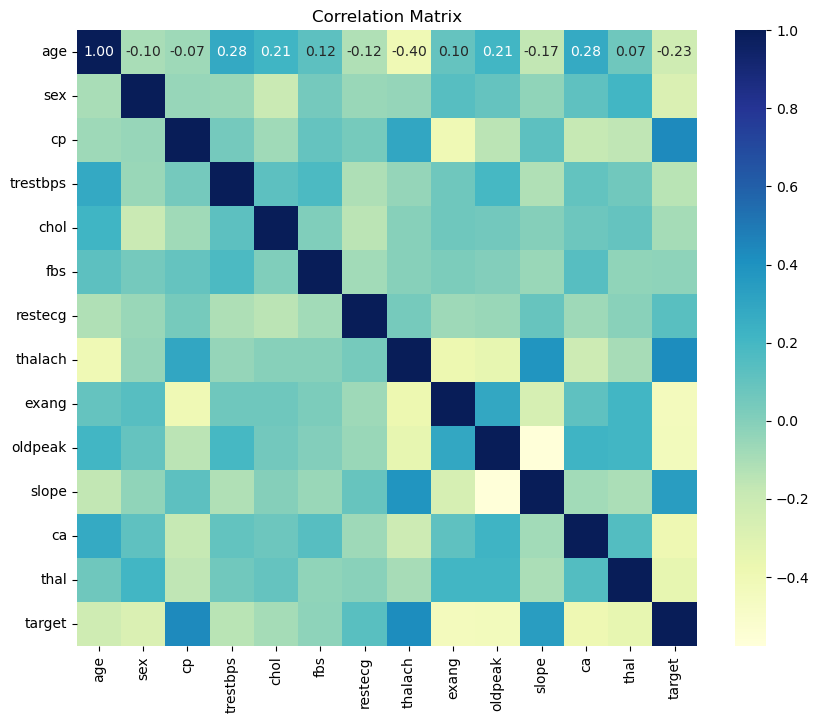

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()


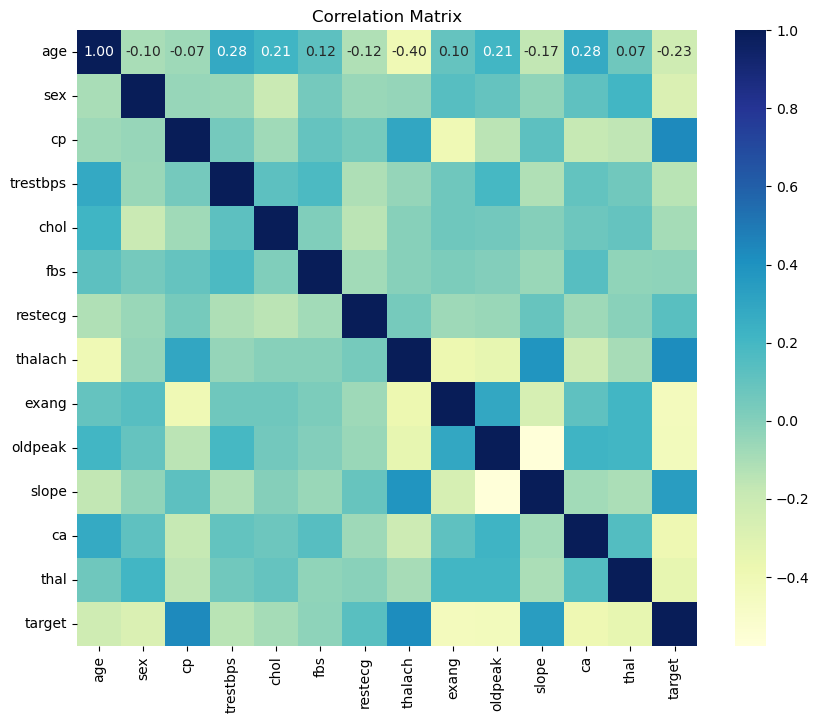

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


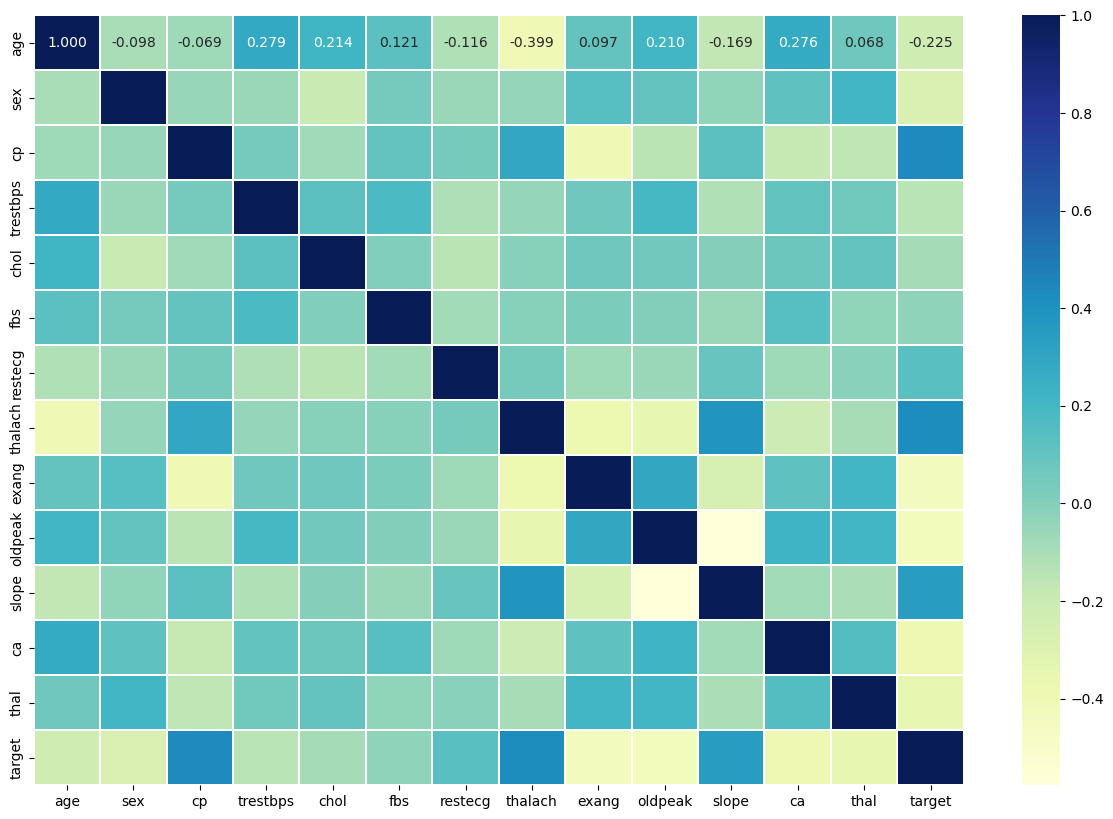

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.1,
                 fmt=".3f",
                 cmap="YlGnBu");



In [80]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [81]:
X = df.drop("target", axis=1)

Y = df["target"]

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2)

In [83]:
# put models in a dictionary
models = {"logistic reg": LogisticRegression(max_iter= 1000000),
          "knn": KNeighborsClassifier(),
          "Random forest": RandomForestClassifier()}

In [84]:
# create a function to score and fit models
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    np.random.seed(42)
    # make a dictionary to keep model scores
    model_scores = {}
    # loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, Y_train)
        # append score to model_scores 
        model_scores[name] = model.score(X_test, Y_test)
        return model_scores
        
 

In [85]:
model_scores = fit_and_score(models= models,
                             X_train= X_train,
                             X_test= X_test,
                             Y_train= Y_train,
                             Y_test= Y_test)
model_scores

{'logistic reg': 0.8032786885245902}

In [86]:
 #put models in a dictionary
models = {"logistic reg": LogisticRegression(max_iter= 1000000),
          "knn": KNeighborsClassifier(),
          "Random forest": RandomForestClassifier()}
# create a function to score and fit models
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    np.random.seed(42)
    # make a dictionary to keep model scores
    model_scores = {}
    # loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, Y_train)
        # append score to model_scores 
        model_scores[name] = model.score(X_test, Y_test)
    return model_scores
        
model_scores = fit_and_score(models= models,
                             X_train= X_train,
                             X_test= X_test,
                             Y_train= Y_train,
                             Y_test= Y_test)
model_scores
 

{'logistic reg': 0.8032786885245902,
 'knn': 0.6229508196721312,
 'Random forest': 0.8688524590163934}

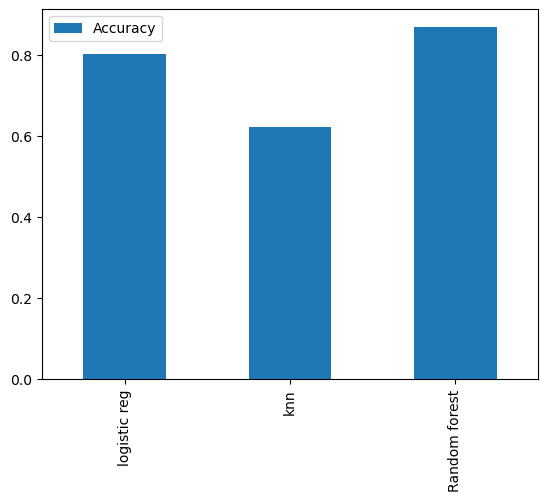

In [87]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot.bar();

lets look at the following:
    *hyperparameter tuning
    *Feature importance
    *Confusing matrix 
    *Cross validation
    *precision 
    *recall 
    *F1 score 
    *classification_report 
    *roc curve 
    *Area under the curve 

In [88]:
train_scores = []
test_scores = []
  
#   create a list of differnt values for n_neighbours 
neighbours = range(1, 21)

# setup KNN instance 
knn = KNeighborsClassifier()

# Loop through different n_neighbours 
for i in neighbours:
    knn.set_params(n_neighbors = i)
    # fit the algorithm 
    knn.fit(X_train, Y_train)
    # update the training scores list 
    train_scores.append(knn.score(X_train, Y_train))
    # update the test scores list 
    test_scores.append(knn.score(X_test, Y_test))

In [89]:
train_scores

[1.0,
 0.8099173553719008,
 0.7892561983471075,
 0.768595041322314,
 0.7768595041322314,
 0.768595041322314,
 0.7644628099173554,
 0.7272727272727273,
 0.7272727272727273,
 0.7355371900826446,
 0.7272727272727273,
 0.7272727272727273,
 0.731404958677686,
 0.7231404958677686,
 0.7355371900826446,
 0.7396694214876033,
 0.7520661157024794,
 0.743801652892562,
 0.7148760330578512,
 0.7148760330578512]

In [90]:
test_scores

[0.6065573770491803,
 0.6065573770491803,
 0.6229508196721312,
 0.6065573770491803,
 0.6229508196721312,
 0.6065573770491803,
 0.5901639344262295,
 0.5737704918032787,
 0.5901639344262295,
 0.5409836065573771,
 0.5737704918032787,
 0.5737704918032787,
 0.5901639344262295,
 0.6229508196721312,
 0.5901639344262295,
 0.6065573770491803,
 0.639344262295082,
 0.639344262295082,
 0.639344262295082,
 0.6065573770491803]

Maximum KNN score on the test data: 63.93%


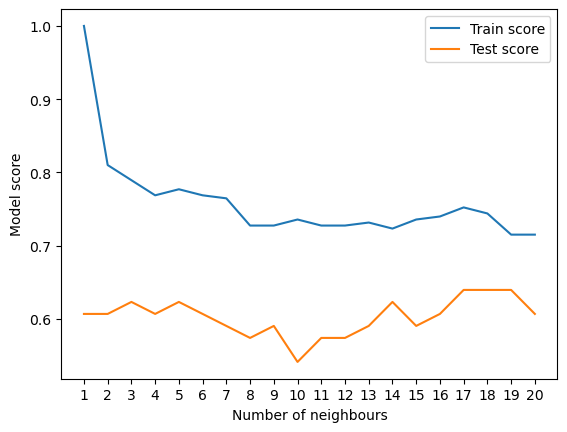

In [91]:
plt.plot(neighbours, train_scores, label= "Train score")
plt.plot(neighbours, test_scores, label= "Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbours")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

hyperparameter tuning with RandomizedSearchCV 

In [92]:
# create a hyperparemaeter gridnfor logistic regression 
logreg_grid = {"c": np.logspace (-4, 4, 20),
                "solver": ["liblinear", "saga"]}

#create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10, 1000,50),
           "max_depth": [None,3, 5, 10],
           "min_sample_split": np.arange(2, 20, 2),
           "min_sample_lead": np.arange(1, 20, 2)}

In [105]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# Define hyperparameters grid
param_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear", "saga"]
}

# Instantiate logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Create RandomizedSearchCV instance
random_search = RandomizedSearchCV(estimator=logreg, 
                                   param_distributions=param_grid, 
                                   n_iter=10, 
                                   scoring='accuracy', 
                                   cv=5, 
                                   verbose=2, 
                                   random_state=42, 
                                   n_jobs=-1)

# Perform random search
random_search.fit(X_train, Y_train)

# Print best parameters and best score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)




Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'solver': 'liblinear', 'C': 0.23357214690901212}
Best score: 0.8303571428571429


AttributeError: 'RandomizedSearchCV' object has no attribute 'coef_'

In [94]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameters grid
param_grid = {
    'n_estimators': np.arange (10, 1000, 50),
    'max_features': [ 'log2', None, 'sqrt'],
    'max_depth': [ None, 3, 5, 10],
    'min_samples_split':np.arange (2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2),
    'bootstrap': [True, False]
}

# Instantiate Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Create RandomizedSearchCV instance
random_search = RandomizedSearchCV(estimator=rf_classifier, 
                                   param_distributions=param_grid, 
                                   n_iter=10, 
                                   scoring='accuracy', 
                                   cv=5, 
                                   verbose=2, 
                                   random_state=42, 
                                   n_jobs=-1)

# Perform random search
random_search.fit(X_train, Y_train)

# Print best parameters and best score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


Best parameters: {'n_estimators': 910, 'min_samples_split': 18, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': False}
Best score: 0.8346088435374149


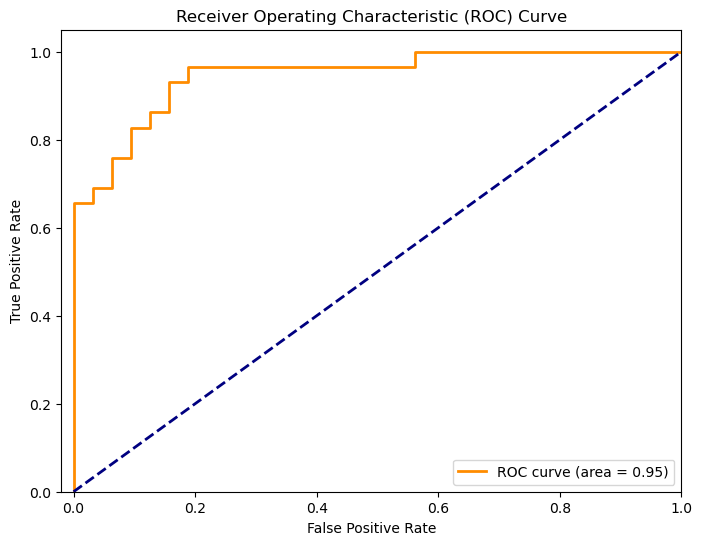

In [95]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
rf_classifier = RandomForestClassifier()

# Assuming clf is your classifier and X_test is your test data
y_scores = random_search.predict_proba(X_test)[:,1]  # Probability estimates of the positive class

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(Y_test, y_scores)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [96]:
#confusion matrix
y_preds = random_search.predict(X_test)
print(confusion_matrix(Y_test, y_preds))

[[23  9]
 [ 1 28]]


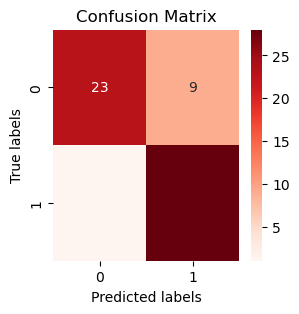

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming Y_test and y_pred are your true and predicted labels, respectively
cm = confusion_matrix(Y_test, y_preds)

# Plotting the heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.show()


In [98]:
print(classification_report(Y_test, y_preds))

              precision    recall  f1-score   support

           0       0.96      0.72      0.82        32
           1       0.76      0.97      0.85        29

    accuracy                           0.84        61
   macro avg       0.86      0.84      0.83        61
weighted avg       0.86      0.84      0.83        61



In [99]:
importances = RandomForestClassifier.feature_importances_
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [100]:

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# Load a sample dataset (you can replace this with your own data)
data = df
X = data.drop("target", axis=1)
y = data["target"]

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size= 0.2)

# Fit the model to the data
rf_classifier.fit(X_train, Y_train)


# Get feature importances
feature_importances = rf_classifier.feature_importances_

feature_importances


array([0.07943952, 0.02642731, 0.12527273, 0.07613082, 0.07662489,
       0.00949756, 0.01910735, 0.14458448, 0.05261865, 0.12345975,
       0.05837321, 0.10933557, 0.09912816])

Feature Importances:
     Feature  Importance
7    thalach    0.144584
2         cp    0.125273
9    oldpeak    0.123460
11        ca    0.109336
12      thal    0.099128
0        age    0.079440
4       chol    0.076625
3   trestbps    0.076131
10     slope    0.058373
8      exang    0.052619
1        sex    0.026427
6    restecg    0.019107
5        fbs    0.009498
model score: 0.80%


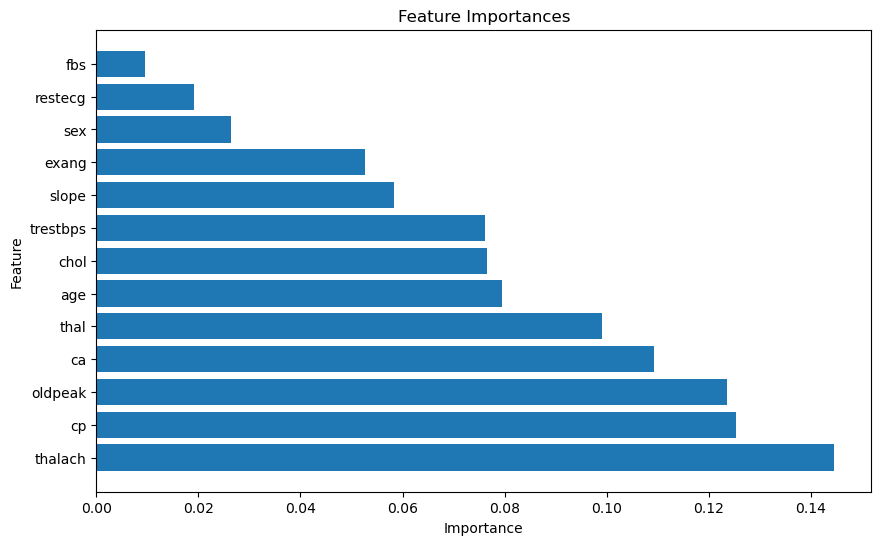

In [101]:
# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Print the feature importances
print("Feature Importances:")
print(feature_importance_df)
print(f"model score: {rf_classifier.score(X_test, Y_test):.2F}%")

# You can also visualize the feature importances using a bar plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


In [109]:
clf = LogisticRegression(C= 0.23357214690901212, solver='liblinear')
clf.fit(X_train, Y_train)
clf.coef_
coefficients = clf.coef_.reshape(-1)

Feature Importances:
     Feature  Importance
2         cp    0.672057
10     slope    0.405825
6    restecg    0.227470
7    thalach    0.029444
0        age    0.007029
4       chol   -0.003579
3   trestbps   -0.015466
5        fbs   -0.141789
8      exang   -0.428765
9    oldpeak   -0.516068
11        ca   -0.528571
12      thal   -0.620930
1        sex   -1.015840
model score: 0.84%


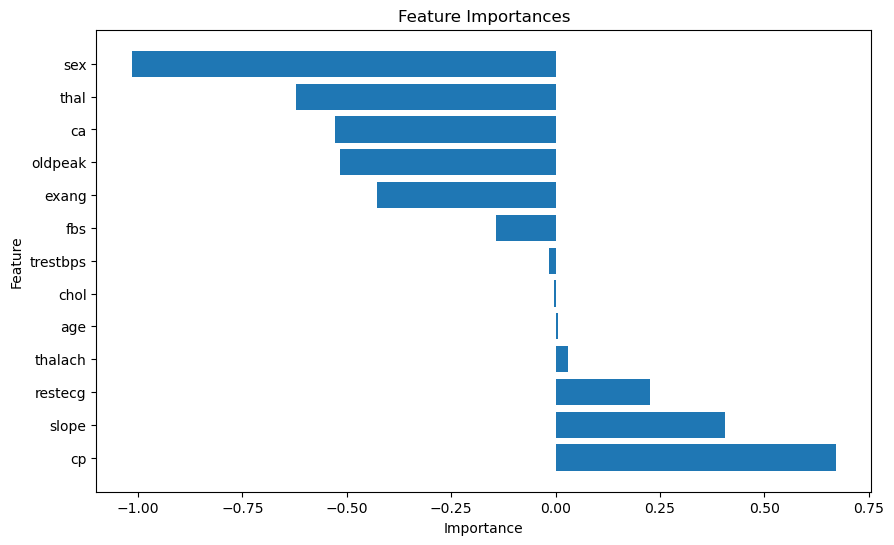

In [110]:
# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': coefficients
})

# Sort features by importance
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Print the feature importances
print("Feature Importances:")
print(feature_importance_df)
print(f"model score: {clf.score(X_test, Y_test):.2F}%")

# You can also visualize the feature importances using a bar plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()
